<a href="https://colab.research.google.com/github/oasquared/DDDS-Cohort-16-Projects/blob/main/SQL_1_Chinook_project_Afeez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [1]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database
import sqlite3 as db
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [3]:
!sqlite3 --version

3.37.2 2022-01-06 13:25:41 872ba256cbf61d9290b571c0e6d82a20c224ca3ad82971edc46b29818d5dalt1


### Upload Chinook

In [4]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [5]:
!rm -f chinook.db

In [6]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [7]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Apr  4 19:05 .
drwxr-xr-x 1 root root   4096 Apr  4 18:57 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Apr  4 19:05 chinook.zip
drwxr-xr-x 4 root root   4096 Apr  3 13:37 .config
drwxr-xr-x 1 root root   4096 Apr  3 13:37 sample_data


### Query using SQLite3

In [8]:
# Get a list of the tables in the database
%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [9]:
# Show the schema for the entire database
%%script sqlite3 --column --header chinook.db
.schema

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

In [10]:
%%script sqlite3 --column --header chinook.db
SELECT 'customers' AS table_name, COUNT(*) AS record_count FROM customers
UNION
SELECT 'invoices', COUNT(*) FROM invoices
UNION
SELECT 'invoice_items', COUNT(*) FROM invoice_items
UNION
SELECT 'tracks', COUNT(*) FROM tracks
UNION
SELECT 'albums', COUNT(*) FROM albums
UNION
SELECT 'artists', COUNT(*) FROM artists
UNION
SELECT 'genres', COUNT(*) FROM genres
UNION
SELECT 'employees', COUNT(*) FROM employees
UNION
SELECT 'media_types', COUNT(*) FROM media_types;

table_name     record_count
-------------  ------------
albums         347         
artists        275         
customers      59          
employees      8           
genres         25          
invoice_items  2240        
invoices       412         
media_types    5           
tracks         3503        


In [11]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(DISTINCT Country) AS num_countries
FROM customers;


num_countries
-------------
24           


In [12]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(DISTINCT City) AS num_cities
FROM customers;


num_cities
----------
53        


In [13]:
%%script sqlite3 --column --header chinook.db
SELECT Country, COUNT(DISTINCT City) AS unique_cities
FROM customers
GROUP BY Country
ORDER BY unique_cities DESC;

Country         unique_cities
--------------  -------------
USA             12           
Canada          8            
France          4            
Brazil          4            
Germany         3            
United Kingdom  2            
Portugal        2            
India           2            
Sweden          1            
Spain           1            
Poland          1            
Norway          1            
Netherlands     1            
Italy           1            
Ireland         1            
Hungary         1            
Finland         1            
Denmark         1            
Czech Republic  1            
Chile           1            
Belgium         1            
Austria         1            
Australia       1            
Argentina       1            


## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


#### SELECT (with * and with column names)


In [14]:
# Query all column on customers table with limit
%%script sqlite3 --column --header chinook.db
select *
from customers
limit 10

CustomerId  FirstName  LastName     Company                                           Address                               City                 State  Country         PostalCode  Phone               Fax                 Email                     SupportRepId
----------  ---------  -----------  ------------------------------------------------  ------------------------------------  -------------------  -----  --------------  ----------  ------------------  ------------------  ------------------------  ------------
1           Luís       Gonçalves    Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170       São José dos Campos  SP     Brazil          12227-000   +55 (12) 3923-5555  +55 (12) 3923-5566  luisg@embraer.com.br      3           
2           Leonie     Köhler                                                         Theodor-Heuss-Straße 34               Stuttgart                   Germany         70174       +49 0711 2842222                        leo

In [15]:
# Query of few column in Customers table
%%script sqlite3 --column --header chinook.db
select CustomerId,FirstName,LastName,SupportRepId
from customers
limit 10

CustomerId  FirstName  LastName     SupportRepId
----------  ---------  -----------  ------------
1           Luís       Gonçalves    3           
2           Leonie     Köhler       5           
3           François   Tremblay     3           
4           Bjørn      Hansen       4           
5           František  Wichterlová  4           
6           Helena     Holý         5           
7           Astrid     Gruber       5           
8           Daan       Peeters      4           
9           Kara       Nielsen      4           
10          Eduardo    Martins      4           


#### WHERE


In [16]:
# filter Brazil from country column
%%script sqlite3 --column --header chinook.db
select CustomerId,FirstName,LastName,SupportRepId,country
from customers
where country = 'Brazil';

CustomerId  FirstName  LastName   SupportRepId  Country
----------  ---------  ---------  ------------  -------
1           Luís       Gonçalves  3             Brazil 
10          Eduardo    Martins    4             Brazil 
11          Alexandre  Rocha      5             Brazil 
12          Roberto    Almeida    3             Brazil 
13          Fernanda   Ramos      4             Brazil 


#### AND


In [17]:
#Provide a query showing the Invoices of customers who are from Brazil. The resultant table should show the customer's full name, Invoice ID, Date of the invoice and billing country.
%%script sqlite3 --column --header chinook.db
select c.firstname, c.lastname, i.invoiceid, i.invoicedate, i.billingcountry
from customers as c, invoices as i
where c.country = 'Brazil' and
c.customerid = i.customerid;

FirstName  LastName   InvoiceId  InvoiceDate          BillingCountry
---------  ---------  ---------  -------------------  --------------
Luís       Gonçalves  98         2010-03-11 00:00:00  Brazil        
Luís       Gonçalves  121        2010-06-13 00:00:00  Brazil        
Luís       Gonçalves  143        2010-09-15 00:00:00  Brazil        
Luís       Gonçalves  195        2011-05-06 00:00:00  Brazil        
Luís       Gonçalves  316        2012-10-27 00:00:00  Brazil        
Luís       Gonçalves  327        2012-12-07 00:00:00  Brazil        
Luís       Gonçalves  382        2013-08-07 00:00:00  Brazil        
Eduardo    Martins    25         2009-04-09 00:00:00  Brazil        
Eduardo    Martins    154        2010-11-14 00:00:00  Brazil        
Eduardo    Martins    177        2011-02-16 00:00:00  Brazil        
Eduardo    Martins    199        2011-05-21 00:00:00  Brazil        
Eduardo    Martins    251        2012-01-09 00:00:00  Brazil        
Eduardo    Martins    372        2

#### OR


In [18]:
%%script sqlite3 --column --header chinook.db
select * from employees
where title = 'Sales Support Agent' or ReportsTo="6";


EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
3           Peacock   Jane       Sales Support Agent  2          1973-08-29 00:00:00  2002-04-01 00:00:00  1111 6 Ave SW                Calgary     AB     Canada   T2P 5M5     +1 (403) 262-3443  +1 (403) 262-6712  jane@chinookcorp.com    
4           Park      Margaret   Sales Support Agent  2          1947-09-19 00:00:00  2003-05-03 00:00:00  683 10 Street SW             Calgary     AB     Canada   T2P 5G3     +1 (403) 263-4423  +1 (403) 263-4289  margaret@chinookcorp.com
5           Johnson   Steve      Sales Suppo

#### LIKE (with % or _ wildcard)


In [19]:
%%script sqlite3 --column --header chinook.db

select * from employees
where LastName like '%son';


EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address       City     State  Country  PostalCode  Phone             Fax               Email                
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ------------  -------  -----  -------  ----------  ----------------  ----------------  ---------------------
5           Johnson   Steve      Sales Support Agent  2          1965-03-03 00:00:00  2003-10-17 00:00:00  7727B 41 Ave  Calgary  AB     Canada   T3B 1Y7     1 (780) 836-9987  1 (780) 836-9543  steve@chinookcorp.com


#### BETWEEN


In [20]:
#How many Invoices were there in 2009 and 2011? What are the respective total sales for each of those years?
%%script sqlite3 --column --header chinook.db
select count(i.invoiceid), sum(i.total)
from invoices as i
where i.invoicedate between datetime('2011-01-01 00:00:00') and datetime('2011-12-31 00:00:00');

select count(i.invoiceid), sum(i.total)
from invoices as i
where i.invoicedate between datetime('2009-01-01 00:00:00') and datetime('2009-12-31 00:00:00');

count(i.invoiceid)  sum(i.total)
------------------  ------------
83                  469.58      
count(i.invoiceid)  sum(i.total)
------------------  ------------
83                  449.46      


#### LIMIT



In [21]:
%%script sqlite3 --column --header chinook.db
select *
from Invoices as i
limit 20

InvoiceId  CustomerId  InvoiceDate          BillingAddress             BillingCity    BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  -------------------------  -------------  ------------  --------------  -----------------  -----
1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34    Stuttgart                    Germany         70174              1.98 
2          4           2009-01-02 00:00:00  Ullevålsveien 14           Oslo                         Norway          0171               3.96 
3          8           2009-01-03 00:00:00  Grétrystraat 63            Brussels                     Belgium         1000               5.94 
4          14          2009-01-06 00:00:00  8210 111 ST NW             Edmonton       AB            Canada          T6G 2C7            8.91 
5          23          2009-01-11 00:00:00  69 Salem Street            Boston         MA            USA             2113               13.86
6          37

### Sorting and Grouping


#### ORDER BY


In [22]:
#Provide a query that shows the invoices associated with each sales agent. The resultant table should include the Sales Agent's full name.
%%script sqlite3 --column --header chinook.db
select e.firstname, e.lastname, i.invoiceid, i.customerid, i.invoicedate, i.billingaddress, i.billingcountry, i.billingpostalcode, i.total
from customers as c, Invoices as i
on c.customerid = i.customerid
join employees as e
on e.employeeid = c.supportrepid
order by e.employeeid DESC
limit 20;


FirstName  LastName  InvoiceId  CustomerId  InvoiceDate          BillingAddress                        BillingCountry  BillingPostalCode  Total
---------  --------  ---------  ----------  -------------------  ------------------------------------  --------------  -----------------  -----
Steve      Johnson   1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34               Germany         70174              1.98 
Steve      Johnson   12         2           2009-02-11 00:00:00  Theodor-Heuss-Straße 34               Germany         70174              13.86
Steve      Johnson   67         2           2009-10-12 00:00:00  Theodor-Heuss-Straße 34               Germany         70174              8.91 
Steve      Johnson   196        2           2011-05-19 00:00:00  Theodor-Heuss-Straße 34               Germany         70174              1.98 
Steve      Johnson   219        2           2011-08-21 00:00:00  Theodor-Heuss-Straße 34               Germany         70174            

#### DISTINCT


In [23]:
# query of title of the employee
%%script sqlite3 --column --header chinook.db
SELECT DISTINCT Title
FROM employees;

Title              
-------------------
General Manager    
Sales Manager      
Sales Support Agent
IT Manager         
IT Staff           


#### GROUP BY



In [24]:
# Provide a query that shows the # of invoices per country.
%%script sqlite3 --column --header chinook.db
select billingcountry, count(billingcountry) as '# of invoices'
from Invoices
group by billingcountry

BillingCountry  # of invoices
--------------  -------------
Argentina       7            
Australia       7            
Austria         7            
Belgium         7            
Brazil          35           
Canada          56           
Chile           7            
Czech Republic  14           
Denmark         7            
Finland         7            
France          35           
Germany         28           
Hungary         7            
India           13           
Ireland         7            
Italy           7            
Netherlands     7            
Norway          7            
Poland          7            
Portugal        14           
Spain           7            
Sweden          7            
USA             91           
United Kingdom  21           


### Aggregates


#### MAX


In [25]:
# Which sales agent made the most in sales over all?
%%script sqlite3 --column --header chinook.db
select *, max(total) from
(select e.*, sum(total) as 'Total'
from employees as e
	join customers as c on e.employeeid = c.supportrepid
	join invoices as i on i.customerid = c.customerid
group by e.employeeid)

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address        City     State  Country  PostalCode  Phone              Fax                Email                 Total             max(total)      
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  -------------  -------  -----  -------  ----------  -----------------  -----------------  --------------------  ----------------  ----------------
3           Peacock   Jane       Sales Support Agent  2          1973-08-29 00:00:00  2002-04-01 00:00:00  1111 6 Ave SW  Calgary  AB     Canada   T2P 5M5     +1 (403) 262-3443  +1 (403) 262-6712  jane@chinookcorp.com  833.040000000001  833.040000000001


#### MIN


In [26]:
# Which sales agent made the least in sales over all?
%%script sqlite3 --column --header chinook.db
select *, MIN(total) from
(select e.*, sum(total) as 'Total'
from employees as e
	join customers as c on e.employeeid = c.supportrepid
	join invoices as i on i.customerid = c.customerid
group by e.employeeid)

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address       City     State  Country  PostalCode  Phone             Fax               Email                  Total             MIN(total)      
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ------------  -------  -----  -------  ----------  ----------------  ----------------  ---------------------  ----------------  ----------------
5           Johnson   Steve      Sales Support Agent  2          1965-03-03 00:00:00  2003-10-17 00:00:00  7727B 41 Ave  Calgary  AB     Canada   T3B 1Y7     1 (780) 836-9987  1 (780) 836-9543  steve@chinookcorp.com  720.160000000001  720.160000000001


#### SUM


In [27]:
# Provide a query that shows the total sales per country. Which country's customers spent the most?
%%script sqlite3 --column --header chinook.db
select i.billingcountry, sum(total) as 'TotalSales'
from invoices as i
group by billingcountry
order by totalsales desc

BillingCountry  TotalSales
--------------  ----------
USA             523.06    
Canada          303.96    
France          195.1     
Brazil          190.1     
Germany         156.48    
United Kingdom  112.86    
Czech Republic  90.24     
Portugal        77.24     
India           75.26     
Chile           46.62     
Ireland         45.62     
Hungary         45.62     
Austria         42.62     
Finland         41.62     
Netherlands     40.62     
Norway          39.62     
Sweden          38.62     
Poland          37.62     
Italy           37.62     
Denmark         37.62     
Australia       37.62     
Argentina       37.62     
Spain           37.62     
Belgium         37.62     


#### AVG


In [28]:
# Provide a query that shows AVG total sales made by each sales agent.
%%script sqlite3 --column --header chinook.db
select e.*, AVG(i.total) as 'Avg_Total Sales'
from employees as e
	join customers as c on e.employeeid = c.supportrepid
	join invoices as i on i.customerid = c.customerid
group by e.employeeid


EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address           City     State  Country  PostalCode  Phone              Fax                Email                     Avg_Total Sales 
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ----------------  -------  -----  -------  ----------  -----------------  -----------------  ------------------------  ----------------
3           Peacock   Jane       Sales Support Agent  2          1973-08-29 00:00:00  2002-04-01 00:00:00  1111 6 Ave SW     Calgary  AB     Canada   T2P 5M5     +1 (403) 262-3443  +1 (403) 262-6712  jane@chinookcorp.com      5.70575342465754
4           Park      Margaret   Sales Support Agent  2          1947-09-19 00:00:00  2003-05-03 00:00:00  683 10 Street SW  Calgary  AB     Canada   T2P 5G3     +1 (403) 263-4423  +1 (403) 263-4289  margaret@chinookcorp.com  5.53857142857144
5           Johnson   Steve 

#### COUNT



In [29]:
# Looking at the Invoice_items table, provide a query that COUNTs the number of line items for Invoice ID 37.
%%script sqlite3 --column --header chinook.db
select count(i.invoicelineid)
from invoice_items as i
where i.invoiceid = 37

count(i.invoicelineid)
----------------------
4                     


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [30]:
import sqlite3
conn = sqlite3.connect("chinook.db")


<ipython-input-31-ca2fa45ebe8b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='BillingCountry', y='TotalSales', palette='coolwarm')


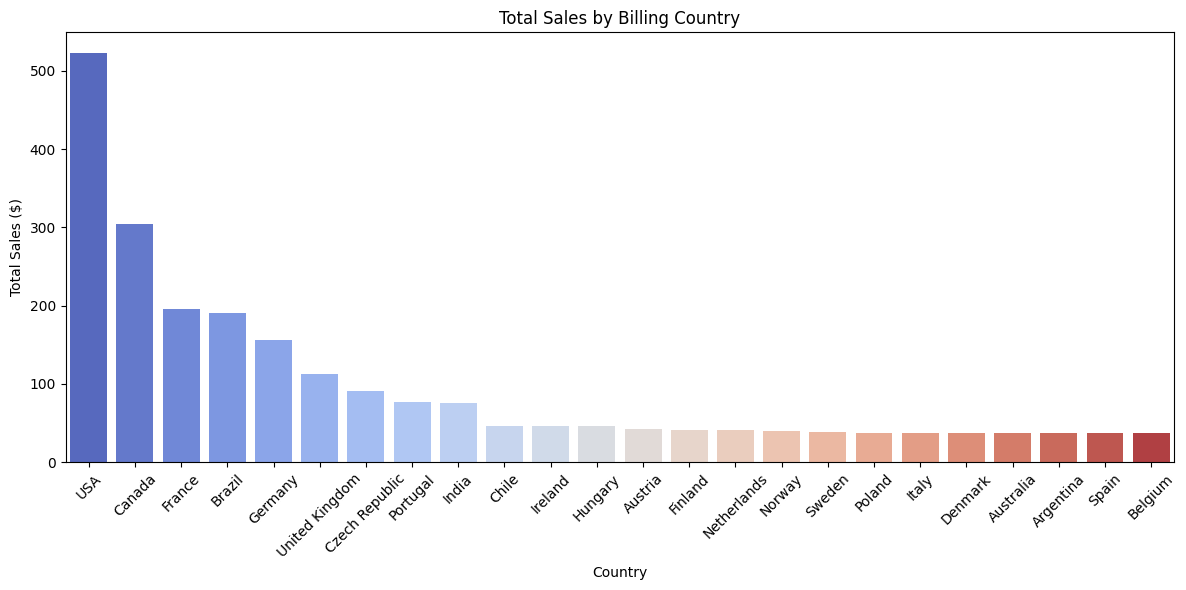

In [31]:
query = '''
SELECT i.BillingCountry, SUM(i.Total) AS TotalSales
FROM invoices AS i
GROUP BY i.BillingCountry
ORDER BY TotalSales DESC
'''

# Run the query and load into DataFrame
df = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='BillingCountry', y='TotalSales', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Total Sales by Billing Country")
plt.ylabel("Total Sales ($)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


In [32]:
%%script sqlite3 --column --header chinook.db
WITH CustomerTotals AS (
    SELECT c.CustomerId, c.FirstName || ' ' || c.LastName AS FullName,
           SUM(i.Total) AS TotalSpent
    FROM customers c
    JOIN invoices i ON c.CustomerId = i.CustomerId
    GROUP BY c.CustomerId
)
SELECT * FROM CustomerTotals
ORDER BY TotalSpent DESC
LIMIT 50;

CustomerId  FullName               TotalSpent
----------  ---------------------  ----------
6           Helena Holý            49.62     
26          Richard Cunningham     47.62     
57          Luis Rojas             46.62     
45          Ladislav Kovács        45.62     
46          Hugh O'Reilly          45.62     
28          Julia Barnett          43.62     
24          Frank Ralston          43.62     
37          Fynn Zimmermann        43.62     
7           Astrid Gruber          42.62     
25          Victor Stevens         42.62     
44          Terhi Hämäläinen       41.62     
5           František Wichterlová  40.62     
43          Isabelle Mercier       40.62     
48          Johannes Van der Berg  40.62     
17          Jack Smith             39.62     
34          João Fernandes         39.62     
1           Luís Gonçalves         39.62     
3           François Tremblay      39.62     
4           Bjørn Hansen           39.62     
20          Dan Miller            

### Model to prediction

In [33]:
import sqlite3
import pandas as pd

# Connect to chinook.db
conn = sqlite3.connect("chinook.db")

# Get customer spending and demographics
query = '''
WITH CustomerTotals AS (
    SELECT c.CustomerId, c.FirstName || ' ' || c.LastName AS FullName,
           c.Country, c.SupportRepId,
           SUM(i.Total) AS TotalSpent
    FROM customers c
    JOIN invoices i ON c.CustomerId = i.CustomerId
    GROUP BY c.CustomerId
)
SELECT * FROM CustomerTotals;
'''

df = pd.read_sql(query, conn)


#### Pull and prepare the data

In [34]:
# Create a binary target variable: High spender or not
df['HighSpender'] = (df['TotalSpent'] > df['TotalSpent'].median()).astype(int)

# Encode categorical variables
df_encoded = pd.get_dummies(df[['Country', 'SupportRepId']], drop_first=True)

# Combine with target
X = df_encoded
y = df['HighSpender']


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.38      0.75      0.50         8
           1       0.00      0.00      0.00        10

    accuracy                           0.33        18
   macro avg       0.19      0.38      0.25        18
weighted avg       0.17      0.33      0.22        18



In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the Chinook database
conn = sqlite3.connect("chinook.db")


In [37]:
query_genre = """
WITH GenreCounts AS (
    SELECT
        c.CustomerId,
        g.Name AS Genre,
        COUNT(ii.InvoiceLineId) AS GenrePurchaseCount
    FROM customers c
    JOIN invoices i ON c.CustomerId = i.CustomerId
    JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
    JOIN tracks t ON ii.TrackId = t.TrackId
    JOIN genres g ON t.GenreId = g.GenreId
    GROUP BY c.CustomerId, g.Name
),
PreferredGenres AS (
    SELECT
        CustomerId,
        Genre
    FROM (
        SELECT
            CustomerId,
            Genre,
            ROW_NUMBER() OVER (PARTITION BY CustomerId ORDER BY GenrePurchaseCount DESC) AS rn
        FROM GenreCounts
    )
    WHERE rn = 1
)
SELECT * FROM PreferredGenres;
"""

df_genre = pd.read_sql(query_genre, conn)
df_genre.head()


,CustomerId,Genre
0,1,Rock
1,2,Rock
2,3,Metal
3,4,Rock
4,5,Rock


<ipython-input-38-9c6abf6f8068>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_month, x='Month', y='MonthlySales', palette='viridis')


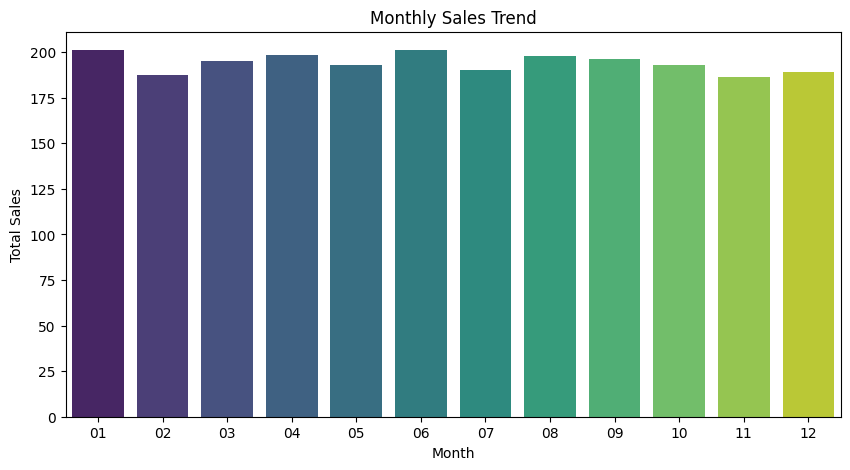

In [38]:
query_month = """
SELECT
    STRFTIME('%m', InvoiceDate) AS Month,
    SUM(Total) AS MonthlySales
FROM invoices
GROUP BY Month
ORDER BY Month;
"""
df_month = pd.read_sql(query_month, conn)

# Plot monthly sales
plt.figure(figsize=(10,5))
sns.barplot(data=df_month, x='Month', y='MonthlySales', palette='viridis')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [39]:
query_rfm = """
WITH InvoiceStats AS (
    SELECT
        CustomerId,
        COUNT(InvoiceId) AS NumPurchases,
        SUM(Total) AS TotalSpent,
        MAX(InvoiceDate) AS LastPurchaseDate,
        JULIANDAY('now') - JULIANDAY(MAX(InvoiceDate)) AS DaysSinceLastPurchase
    FROM invoices
    GROUP BY CustomerId
)
SELECT * FROM InvoiceStats;
"""
df_rfm = pd.read_sql(query_rfm, conn)
df_rfm = df_rfm.merge(df_genre, on='CustomerId')  # Add genre label
df_rfm.head()


,CustomerId,NumPurchases,TotalSpent,LastPurchaseDate,DaysSinceLastPurchase,Genre
0,1,7,39.62,2013-08-07 00:00:00,4258.79525,Rock
1,2,7,37.62,2012-07-13 00:00:00,4648.79525,Rock
2,3,7,39.62,2013-09-20 00:00:00,4214.79525,Metal
3,4,7,39.62,2013-10-03 00:00:00,4201.79525,Rock
4,5,7,40.62,2013-05-06 00:00:00,4351.79525,Rock


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                    precision    recall  f1-score   support

Alternative & Punk       0.00      0.00      0.00         0
             Latin       0.00      0.00      0.00         1
             Metal       0.00      0.00      0.00         0
              Rock       0.92      0.71      0.80        17

          accuracy                           0.67        18
         macro avg       0.23      0.18      0.20        18
      weighted avg       0.87      0.67      0.76        18



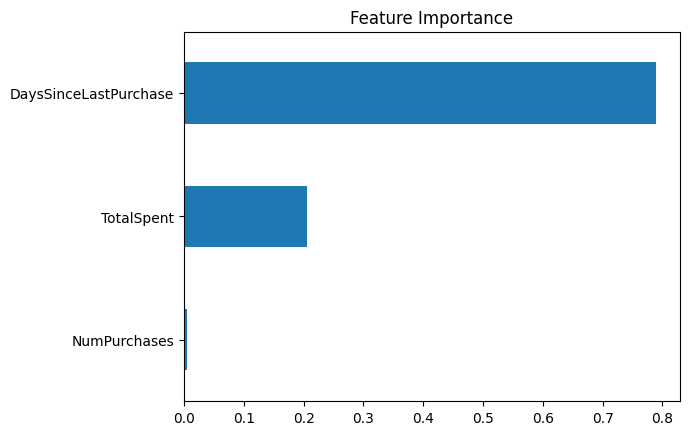

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Encode Genre label
le = LabelEncoder()
df_rfm['GenreEncoded'] = le.fit_transform(df_rfm['Genre'])

# Features and target
X = df_rfm[['NumPurchases', 'TotalSpent', 'DaysSinceLastPurchase']]
y = df_rfm['GenreEncoded']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Show feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.plot(kind='barh', title='Feature Importance')
plt.show()


In [41]:
%%script sqlite3 --column --header chinook.db
WITH InvoiceStats AS (
    SELECT
        CustomerId,
        COUNT(InvoiceId) AS NumPurchases,
        SUM(Total) AS TotalSpent,
        MAX(InvoiceDate) AS LastPurchaseDate,
        JULIANDAY('now') - JULIANDAY(MAX(InvoiceDate)) AS DaysSinceLastPurchase
    FROM invoices
    GROUP BY CustomerId
)
SELECT * FROM InvoiceStats
limit 10;


CustomerId  NumPurchases  TotalSpent  LastPurchaseDate     DaysSinceLastPurchase
----------  ------------  ----------  -------------------  ---------------------
1           7             39.62       2013-08-07 00:00:00  4258.7952570254      
2           7             37.62       2012-07-13 00:00:00  4648.7952570254      
3           7             39.62       2013-09-20 00:00:00  4214.7952570254      
4           7             39.62       2013-10-03 00:00:00  4201.7952570254      
5           7             40.62       2013-05-06 00:00:00  4351.7952570254      
6           7             49.62       2013-11-13 00:00:00  4160.7952570254      
7           7             42.62       2013-06-19 00:00:00  4307.7952570254      
8           7             37.62       2013-10-04 00:00:00  4200.7952570254      
9           7             37.62       2013-02-02 00:00:00  4444.7952570254      
10          7             37.62       2013-08-12 00:00:00  4253.7952570254      
